# Data fetching

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import pandas as pd
import requests
 
df = pd.read_csv('full_city_list.txt', sep=";")
df_arg = df[df['Country']=='Argentina']
 
province_lst = []

for i in range(len(df_arg)):
    province_id = int(df_arg.iloc[i]['CityId'])
    url = 'https://worldweather.wmo.int/en/json/' + str(province_id) + '_en.json'
    response = requests.get(url)
    province_json = response.json()
    province_lst.append(province_json)
print(len(province_lst))

10


In [56]:
province_lst[0]

{'city': {'lang': 'en',
  'cityName': 'Bariloche',
  'cityLatitude': '-41.150000000',
  'cityLongitude': '-71.170000000',
  'cityId': 858,
  'isCapital': False,
  'stationName': 'Bariloche',
  'tourismURL': '',
  'tourismBoardName': '',
  'isDep': False,
  'timeZone': '-0300',
  'isDST': 'N',
  'member': {'memId': 50,
   'memName': 'Argentina',
   'shortMemName': '',
   'url': 'www.smn.gov.ar',
   'orgName': 'Servicio Meteorológico Nacional',
   'logo': 'argentina_logo.png',
   'ra': 3},
  'forecast': {'issueDate': '2025-04-20 17:32:00',
   'timeZone': 'Local',
   'forecastDay': [{'forecastDate': '2025-04-21',
     'wxdesc': '',
     'weather': 'Rain',
     'minTemp': '7',
     'maxTemp': '15',
     'minTempF': '45',
     'maxTempF': '59',
     'weatherIcon': 1401},
    {'forecastDate': '2025-04-22',
     'wxdesc': '',
     'weather': 'Rain',
     'minTemp': '5',
     'maxTemp': '14',
     'minTempF': '41',
     'maxTempF': '57',
     'weatherIcon': 1401},
    {'forecastDate': '2025-04

# Main Dataframe

In [57]:
# import pandas as pd 
# df = pd.read_json('Cordoba.json')
# df
import pandas as pd
df = pd.json_normalize(province_lst[0])


In [58]:
df

,city.lang,city.cityName,city.cityLatitude,city.cityLongitude,city.cityId,city.isCapital,city.stationName,city.tourismURL,city.tourismBoardName,city.isDep,...,city.climate.datab,city.climate.datae,city.climate.tempb,city.climate.tempe,city.climate.rdayb,city.climate.rdaye,city.climate.rainfallb,city.climate.rainfalle,city.climate.climatefromclino,city.climate.climateMonth
0,en,Bariloche,-41.150000000,-71.170000000,858,False,Bariloche,,,False,...,1981,2010,,,,,,,,"[{'month': 1, 'maxTemp': '22.6', 'minTemp': '6..."


# OBJECT SEGMENTATION

### 3 objects -> [city,member] ; [forecast]; [climate]

In [59]:
import pandas as pd
from pandas import json_normalize

mem_cols = ['city.lang', 'city.cityName', 'city.cityLatitude', 'city.cityLongitude',
    'city.cityId', 'city.isCapital', 'city.stationName', 'city.tourismURL',
    'city.tourismBoardName', 'city.isDep', 'city.timeZone', 'city.isDST',
    'city.member.memId', 'city.member.memName', 'city.member.shortMemName',
    'city.member.url', 'city.member.orgName', 'city.member.logo',
    'city.member.ra']

city_member = df[mem_cols]
city_member


,city.lang,city.cityName,city.cityLatitude,city.cityLongitude,city.cityId,city.isCapital,city.stationName,city.tourismURL,city.tourismBoardName,city.isDep,city.timeZone,city.isDST,city.member.memId,city.member.memName,city.member.shortMemName,city.member.url,city.member.orgName,city.member.logo,city.member.ra
0,en,Bariloche,-41.150000000,-71.170000000,858,False,Bariloche,,,False,-0300,N,50,Argentina,,www.smn.gov.ar,Servicio Meteorológico Nacional,argentina_logo.png,3


In [60]:
import pandas as pd
from pandas import json_normalize

# Define the columns to keep (excluding the nested column to normalize)
climate_cols = [
    'city.climate.raintype', 'city.climate.raindef', 'city.climate.rainunit',
    'city.climate.datab', 'city.climate.datae', 'city.climate.tempb', 'city.climate.tempe',
    'city.climate.rdayb', 'city.climate.rdaye', 'city.climate.rainfallb', 'city.climate.rainfalle',
    'city.climate.climatefromclino'
]

changes = ['city.climate.climateMonth']  # nested column to normalize

# Extract non-nested columns
df_base = df[climate_cols].copy().reset_index(drop=True)

# Normalize nested column
normalized_parts = []
for col in changes:
    nested_data = df[col]
    exploded = nested_data.explode().reset_index(drop=True)
    norm = json_normalize(exploded)
    norm.columns = [f"{col}.{sub}" for sub in norm.columns]
    normalized_parts.append(norm)

# Combine base + normalized
city_climate = pd.concat([df_base] + normalized_parts, axis=1)

# Show result
city_climate


,city.climate.raintype,city.climate.raindef,city.climate.rainunit,city.climate.datab,city.climate.datae,city.climate.tempb,city.climate.tempe,city.climate.rdayb,city.climate.rdaye,city.climate.rainfallb,...,city.climate.climateMonth.month,city.climate.climateMonth.maxTemp,city.climate.climateMonth.minTemp,city.climate.climateMonth.meanTemp,city.climate.climateMonth.maxTempF,city.climate.climateMonth.minTempF,city.climate.climateMonth.meanTempF,city.climate.climateMonth.raindays,city.climate.climateMonth.rainfall,city.climate.climateMonth.climateFromMemDate
0,Rainfall,0.1,mm,1981.0,2010.0,,,,,,...,1,22.6,6.6,None,72.7,43.9,None,3.7,20.0,2002-11-15
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,23.0,6.3,None,73.4,43.3,None,3.4,15.3,2002-11-15
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,19.7,4.7,None,67.5,40.5,None,6.7,35.2,2002-11-15
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,14.6,2.3,None,58.3,36.1,None,8.2,58.9,2002-11-15
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,10.2,0.6,None,50.4,33.1,None,13.6,130.1,2002-11-15
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,6.9,-0.6,None,44.4,30.9,None,16.1,170.1,2002-11-15
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,6.7,-1.6,None,44.1,29.1,None,14.0,122.1,2002-11-15
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,8.3,-1.1,None,46.9,30.0,None,13.0,101.1,2002-11-15
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,11.5,-0.2,None,52.7,31.6,None,9.1,56.5,2002-11-15
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,14.8,1.8,None,58.6,35.2,None,8.3,49.4,2002-11-15


In [61]:
import pandas as pd
from pandas import json_normalize

# Define forecast columns
forecast_cols = ['city.forecast.issueDate', 'city.forecast.timeZone']
nested_col = 'city.forecast.forecastDay'

# Extract base columns (excluding nested list)
df_base = df[forecast_cols].copy().reset_index(drop=True)

# Explode and normalize nested forecast list (assuming it's a list of dicts)
exploded = df[nested_col].apply(pd.Series).stack().reset_index(level=1, drop=True)
exploded = exploded.reset_index(drop=True)

# Normalize each forecast entry
forecast_normalized = json_normalize(exploded)

# Add a label: Today, Today+1, ..., Today+6
forecast_normalized['ForecastDay'] = ['Today+{}'.format(i) for i in range(len(forecast_normalized))]

# If your original df has multiple cities, repeat each city’s info for 7 rows
df_repeated = pd.concat([df_base.loc[i].repeat(7) for i in df_base.index], ignore_index=True)

# Combine everything
city_forecast = pd.concat([df_repeated.reset_index(drop=True), forecast_normalized], axis=1)

# Reorder columns if needed
city_forecast = city_forecast[['ForecastDay', 'forecastDate', 'wxdesc', 'weather', 'minTemp', 'maxTemp', 'minTempF', 'maxTempF', 'weatherIcon']]

city_forecast = city_forecast.head(7)

# Show result
city_forecast


,ForecastDay,forecastDate,wxdesc,weather,minTemp,maxTemp,minTempF,maxTempF,weatherIcon
0,Today+0,2025-04-21,,Rain,7,15,45,59,1401.0
1,Today+1,2025-04-22,,Rain,5,14,41,57,1401.0
2,Today+2,2025-04-23,,Partly Cloudy,6,14,43,57,2202.0
3,Today+3,2025-04-24,,Light Rain,4,12,39,54,1502.0
4,Today+4,2025-04-25,,Light Rain,3,12,37,54,1502.0
5,Today+5,2025-04-26,,Mostly Cloudy,2,8,36,46,2302.0
6,Today+6,2025-04-27,,Partly Cloudy,1,6,34,43,2202.0


# 

# rutujas code 

### forecast 

In [44]:
city_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ForecastDay   7 non-null      object 
 1   forecastDate  7 non-null      object 
 2   wxdesc        7 non-null      object 
 3   weather       7 non-null      object 
 4   minTemp       7 non-null      object 
 5   maxTemp       7 non-null      object 
 6   minTempF      7 non-null      object 
 7   maxTempF      7 non-null      object 
 8   weatherIcon   7 non-null      float64
dtypes: float64(1), object(8)
memory usage: 632.0+ bytes


In [62]:
city_forecast['minTemp'] = pd.to_numeric(city_forecast['minTemp'])
city_forecast['maxTemp'] = pd.to_numeric(city_forecast['maxTemp'])

city_forecast['forecastDate'] = pd.to_datetime(city_forecast['forecastDate'])
city_forecast['Date'] = city_forecast['forecastDate'].dt.strftime('%d %b (%a)')

In [63]:
icon_map = {
    'Showers': '🌧️',
    'Partly Cloudy': '⛅',
    'Mostly Cloudy': '☁️',
    'Sunny': '☀️',
    'Cloudy': '☁️',
    'Rain': '🌧️',
    'Thunderstorm': '⛈️'
}

city_forecast['Icon'] = city_forecast['weather'].map(icon_map).fillna('🌈')  

city_forecast['Temp (°C)'] = city_forecast['minTemp'].astype(str) + '°C | ' + city_forecast['maxTemp'].astype(str)+ '°C'

In [64]:
forecast_table_df = city_forecast[['Date', 'Temp (°C)', 'Icon', 'weather']]
forecast_table_df.rename(columns={
    'weather': 'Description'
}, inplace=True)
#forecast_table_df

In [65]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(forecast_table_df.columns),
                fill_color='#003f5c',
                font=dict(color='white', size=14),
                align='center'),
    cells=dict(values=[forecast_table_df[col] for col in forecast_table_df.columns],
               fill_color=[['#f0f0f0','white']*int((len(forecast_table_df)/2)+1)],
               align='center',
               font=dict(size=13)))
])

fig.update_layout(title_text=" 7-Day Weather Forecast ", title_font_size=20)
fig.show()

### forecast climate info

In [66]:
city_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   city.climate.raintype                         1 non-null      object 
 1   city.climate.raindef                          1 non-null      object 
 2   city.climate.rainunit                         1 non-null      object 
 3   city.climate.datab                            1 non-null      float64
 4   city.climate.datae                            1 non-null      float64
 5   city.climate.tempb                            1 non-null      object 
 6   city.climate.tempe                            1 non-null      object 
 7   city.climate.rdayb                            1 non-null      object 
 8   city.climate.rdaye                            1 non-null      object 
 9   city.climate.rainfallb                        1 non-null      objec

In [69]:
city_climate['city.climate.climateMonth.month'] = pd.to_datetime(city_climate['city.climate.climateMonth.month'], format='%m').dt.strftime('%b')

city_climate['city.climate.climateMonth.minTemp'] = pd.to_numeric(city_climate['city.climate.climateMonth.minTemp'])
city_climate['city.climate.climateMonth.maxTemp'] = pd.to_numeric(city_climate['city.climate.climateMonth.maxTemp'])
city_climate['city.climate.climateMonth.rainfall'] = pd.to_numeric(city_climate['city.climate.climateMonth.rainfall'])

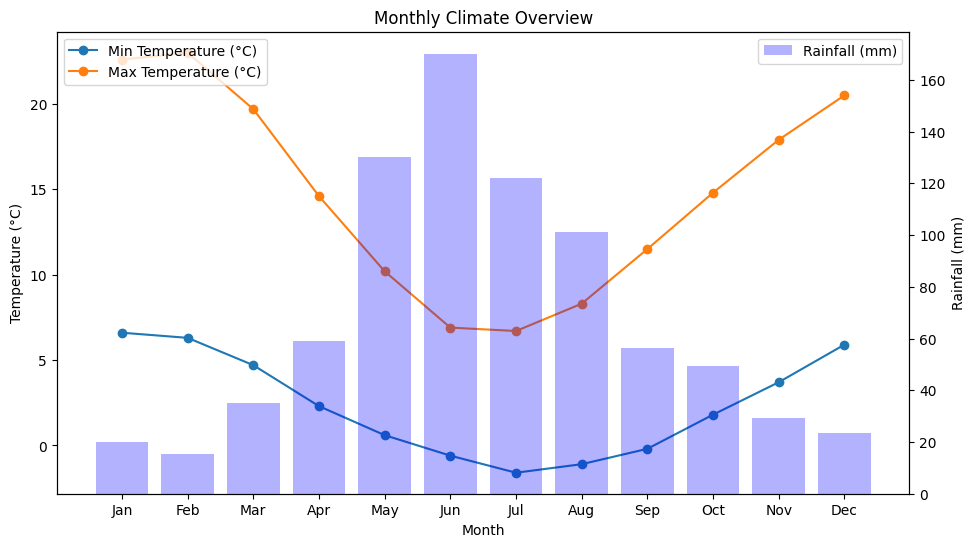

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))

# Min and Max Temperature
plt.plot(city_climate['city.climate.climateMonth.month'], city_climate['city.climate.climateMonth.minTemp'], label='Min Temperature (°C)', marker='o')
plt.plot(city_climate['city.climate.climateMonth.month'], city_climate['city.climate.climateMonth.maxTemp'], label='Max Temperature (°C)', marker='o')

# Twin y-axis for rainfall
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.bar(city_climate['city.climate.climateMonth.month'], city_climate['city.climate.climateMonth.rainfall'], alpha=0.3, color='blue', label='Rainfall (mm)')

# Labels and titles
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)')
ax2.set_ylabel('Rainfall (mm)')
plt.title('Monthly Climate Overview')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#plt.grid(True)
plt.show()

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [83]:
city_climate.index = pd.period_range(start='2025-01', periods=12, freq='M')

def forecast_series(series, periods=3):
    model = auto_arima(series, seasonal=False)
    forecast = model.predict(n_periods=periods)
    return forecast

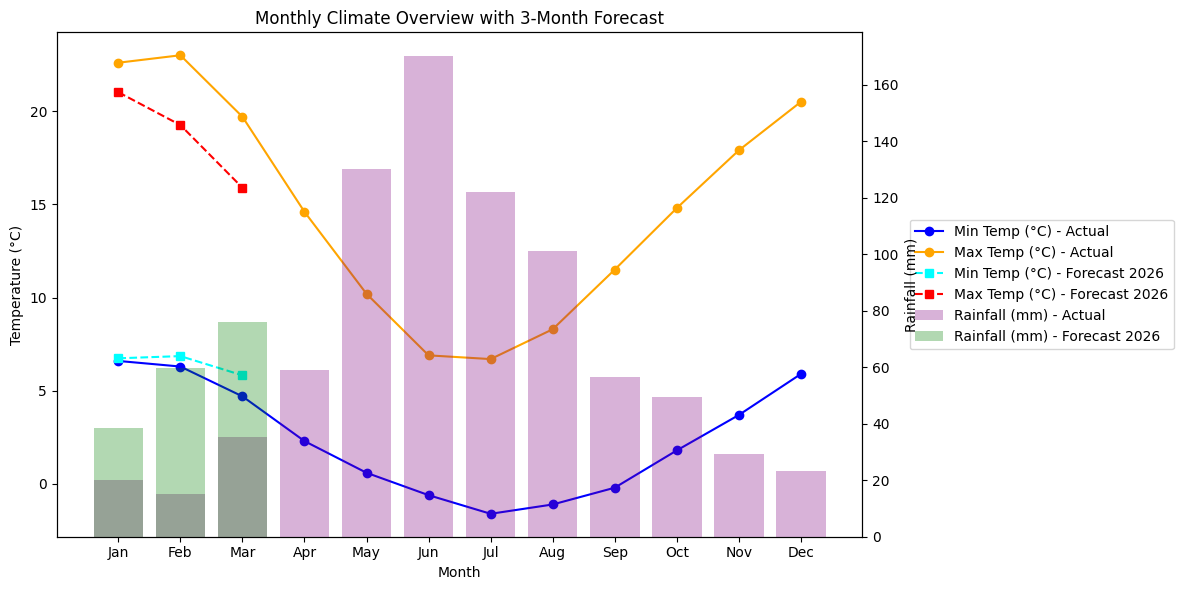

In [96]:
# Forecast periods
forecast_periods = 3
future_months = pd.period_range(start='2026-01', periods=forecast_periods, freq='M').strftime('%b')

# Forecast values
minTemp_forecast = forecast_series(city_climate['city.climate.climateMonth.minTemp'])
maxTemp_forecast = forecast_series(city_climate['city.climate.climateMonth.maxTemp'])
rainfall_forecast = forecast_series(city_climate['city.climate.climateMonth.rainfall'])

# Combine month names for x-axis labels
all_months = list(city_climate.index.strftime('%b')) + list(future_months)

# Combine actual and forecasted values for plotting
min_temp_full = list(city_climate['city.climate.climateMonth.minTemp']) + list(minTemp_forecast)
max_temp_full = list(city_climate['city.climate.climateMonth.maxTemp']) + list(maxTemp_forecast)
rainfall_full  = list(city_climate['city.climate.climateMonth.rainfall'])  + list(rainfall_forecast)

plt.figure(figsize=(12, 6))

# Actual Temperatures
ax1 = plt.gca()
ax1.plot(all_months[:12], min_temp_full[:12], label='Min Temp (°C) - Actual', marker='o', color='blue')
ax1.plot(all_months[:12], max_temp_full[:12], label='Max Temp (°C) - Actual', marker='o', color='orange')

# Forecast Temperatures (starting properly at forecast months)
ax1.plot(all_months[12:15], min_temp_full[12:15], linestyle='--', color='cyan', marker='s', label='Min Temp (°C) - Forecast 2026')
ax1.plot(all_months[12:15], max_temp_full[12:15], linestyle='--', color='red', marker='s', label='Max Temp (°C) - Forecast 2026')

# Twin axis for Rainfall
ax2 = ax1.twinx()

# Actual Rainfall
ax2.bar(all_months[:12], rainfall_full[:12], alpha=0.3, color='purple', label='Rainfall (mm) - Actual')

# Forecast Rainfall
ax2.bar(all_months[12:15], rainfall_full[12:15], alpha=0.3, color='green', label='Rainfall (mm) - Forecast 2026')

# Labels and Title
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)')
ax2.set_ylabel('Rainfall (mm)')
plt.title('Monthly Climate Overview with 3-Month Forecast')

# Combine legends from both axes and place them outside the plot
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1.05, 0.5))

# Adjust layout to fit everything cleanly
plt.tight_layout()

# Show plot
plt.show()


In [97]:
forecast_df_next3Month = pd.DataFrame({
    'Month': future_months,
    'Min Temp (°C)': minTemp_forecast,
    'Max Temp (°C)': maxTemp_forecast,
    'Rainfall (mm)': rainfall_forecast
})

# Display forecast table
print("\n3-Month Forecast:")
print(forecast_df_next3Month)


3-Month Forecast:
        Month  Min Temp (°C)  Max Temp (°C)  Rainfall (mm)
2026-01   Jan       6.742361      21.017573      38.323755
2026-02   Feb       6.859846      19.255000      59.646052
2026-03   Mar       5.828456      15.893857      75.972837
